### Mushrooms Classification 

In [1]:
#Importing required libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
#Importing csv data as a dataframe
df = pd.read_csv("dataset/mushrooms.csv")

In [5]:
#Getting by default first 5 records of dataset
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### Data Preprocessing

In [6]:
#Number of rows and columns in a dataset
df.shape

(8124, 23)

In [7]:
#Columns of dataset
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [8]:
#Information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [9]:
#Statistical summary of dataset
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [10]:
#Checking missing values in dataset
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [11]:
#There is no missing values in dataset

In [12]:
#Checking duplicate values in dataset 
df.duplicated().sum()

0

In [13]:
#Let's check total number of categorical values in each columns of dataset
for col in df.columns:
  print(df[col].value_counts())

class
e    4208
p    3916
Name: count, dtype: int64
cap-shape
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: count, dtype: int64
cap-surface
y    3244
s    2556
f    2320
g       4
Name: count, dtype: int64
cap-color
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: count, dtype: int64
bruises
f    4748
t    3376
Name: count, dtype: int64
odor
n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: count, dtype: int64
gill-attachment
f    7914
a     210
Name: count, dtype: int64
gill-spacing
c    6812
w    1312
Name: count, dtype: int64
gill-size
b    5612
n    2512
Name: count, dtype: int64
gill-color
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: count, dtype: int64
stalk-shape
t    4608
e    3516
Name: count, dtype: int64
stalk-root
b    3776
?    2480
e    1120
c     556
r     192
Name: coun

### EDA
 - In the EDA step, we will visualize the each feature by its class distribution.
 - The class refers that the information of this mushroom is edible or poisonous.

In [14]:
df['class'].value_counts(normalize = True)

class
e    0.517971
p    0.482029
Name: proportion, dtype: float64

In [15]:
#We can see that dataset in balanced.

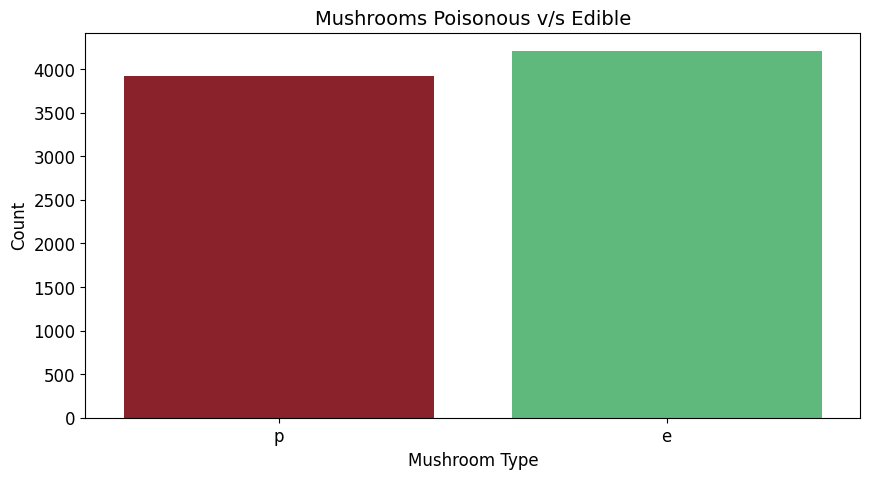

In [16]:
#Let's visualize target variable of dataset
plt.figure(figsize=(10,5))
plt.title('Mushrooms Poisonous v/s Edible', fontsize=14)
sns.countplot(x="class", data=df, palette=('#9b111e','#50c878'))
plt.xlabel("Mushroom Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Observations :- 
 - There is no imbalance data in class features.
 - Total number of edible mushrooms are nearly close to the total number of poisonous mushrooms in the dataset. 

In [17]:
#Here we drop constant features 'veil-type' from dataset, because it has only one category type. 
df = df.drop('veil-type', axis = 1)

In [18]:
df.shape

(8124, 22)

In [19]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')

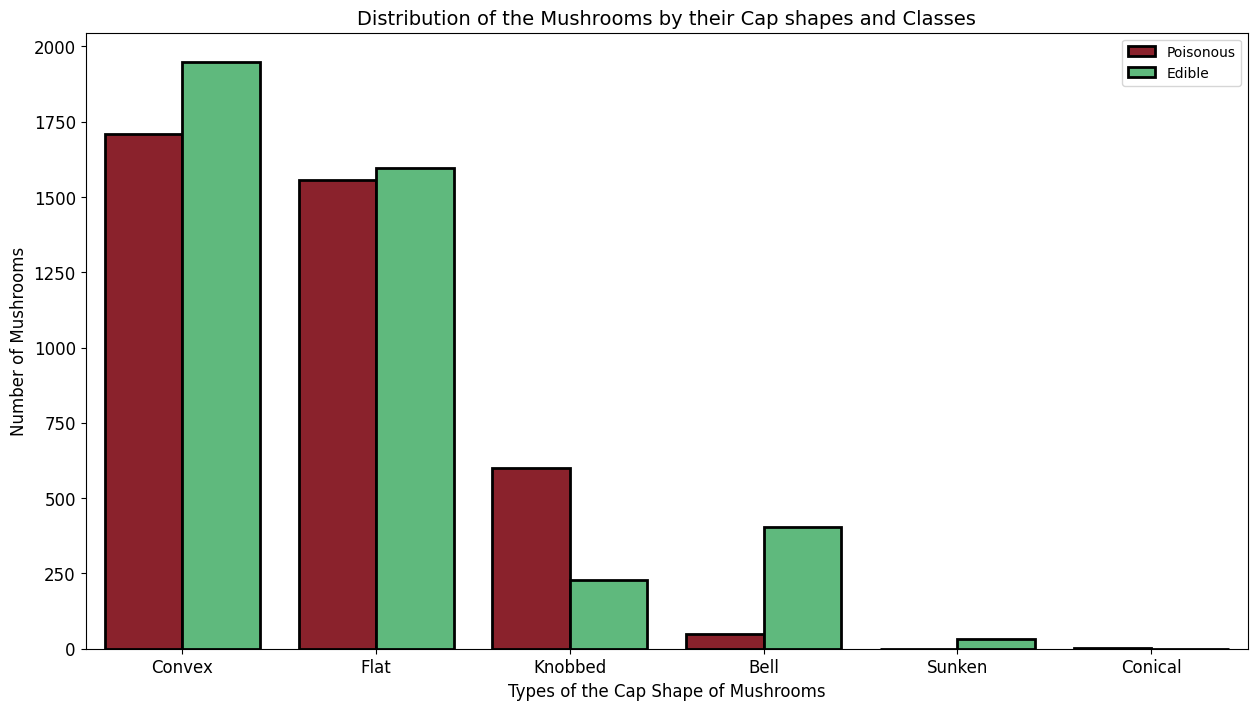

In [20]:
## Cap Shape Feature

plt.figure(figsize= (15, 8))
fplot = sns.countplot(x = 'cap-shape', hue= 'class',data= df,order=df['cap-shape'].value_counts().index,
              palette= ['#9b111e','#50c878'],edgecolor= (0,0,0), linewidth= 2)
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.xlabel("Types of the Cap Shape of Mushrooms", fontsize= 12)
plt.ylabel("Number of Mushrooms", fontsize= 12)
fplot.set_xticklabels(['Convex', 'Flat', 'Knobbed', 'Bell', 'Sunken', 'Conical'])
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)
plt.title("Distribution of the Mushrooms by their Cap shapes and Classes", fontsize = 14)
plt.show()

### Observation:-
 - From the above plot we can say that Convex cap-shape are more in numbers. 
 - The edible and poisonous class mushrooms are pretty close to each other for the cap-shape Convex and the Flat type.
 - Distribution of class mushrooms for cap-shape Bell type is imbalanced.
 - Both cap-shape Sunken and Conical types are completely edible class mushrooms. 

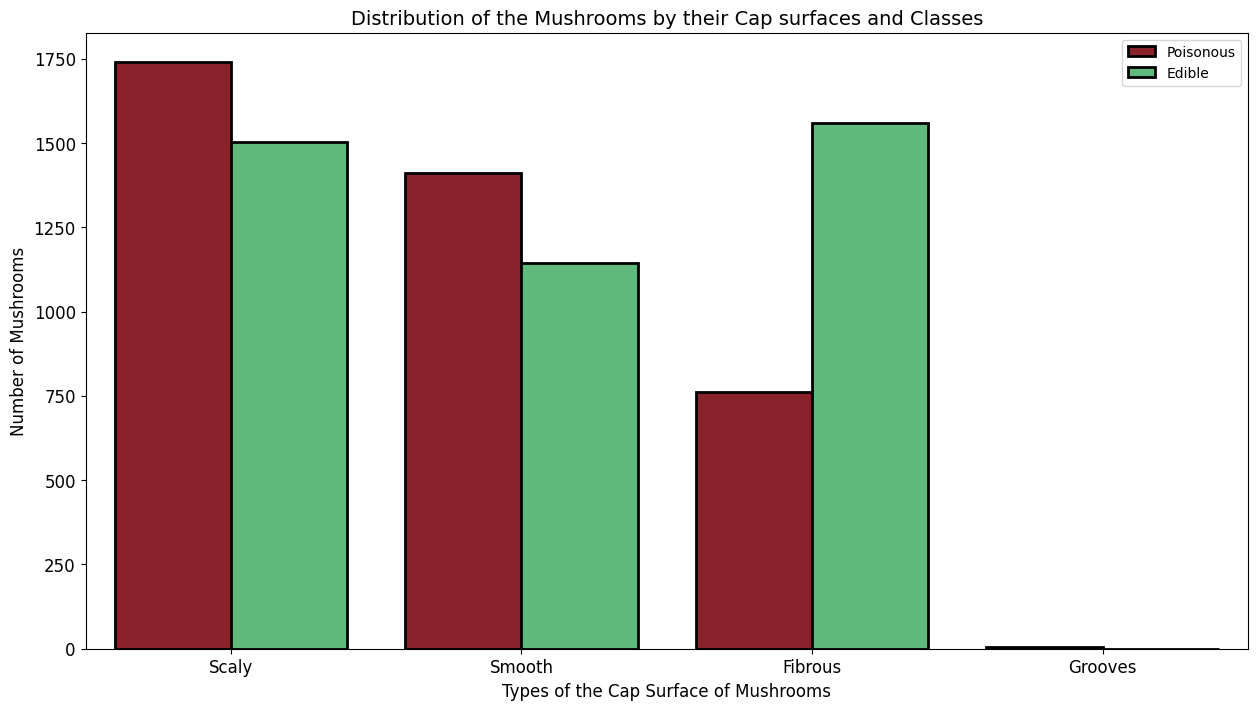

In [21]:
#Cap - Surfaces 

plt.figure(figsize= (15, 8))
fplot = sns.countplot(x = 'cap-surface', hue= 'class',data= df,order=df['cap-surface'].value_counts().index,
              palette= ['#9b111e','#50c878'],edgecolor= (0,0,0), linewidth= 2)
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.xlabel("Types of the Cap Surface of Mushrooms", fontsize= 12)
plt.ylabel("Number of Mushrooms", fontsize= 12)
fplot.set_xticklabels(['Scaly', 'Smooth', 'Fibrous', 'Grooves'])
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)
plt.title("Distribution of the Mushrooms by their Cap surfaces and Classes", fontsize = 14)
plt.show()

### Observation:-
 - From the above plot, we can say that for the cap surfaces types Scaly and Smooth, the probability of poisonous class is more.
 - For the cap surface type fibrous, the probability of edible class is more compared to poisonous class.

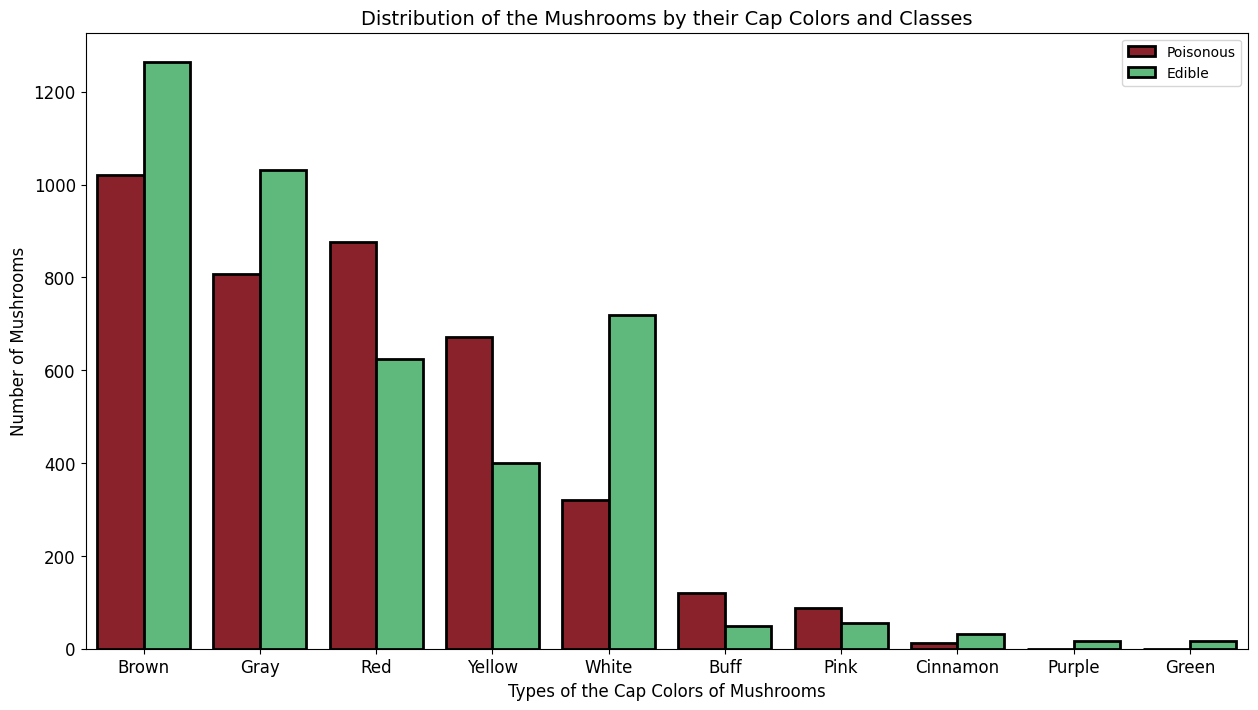

In [22]:
#Cap Colors

plt.figure(figsize= (15, 8))
fplot = sns.countplot(x = 'cap-color', hue= 'class',data= df,order=df['cap-color'].value_counts().index,
              palette= ['#9b111e','#50c878'],edgecolor= (0,0,0), linewidth= 2)
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.xlabel("Types of the Cap Colors of Mushrooms", fontsize= 12)
plt.ylabel("Number of Mushrooms", fontsize= 12)
fplot.set_xticklabels(['Brown', 'Gray', 'Red', 'Yellow', 'White', 'Buff', 'Pink', 'Cinnamon', 'Purple', 'Green'])
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)
plt.title("Distribution of the Mushrooms by their Cap Colors and Classes", fontsize = 14)
plt.show()

### Observation:- 
 - The total number of edible and poisonous class mushrooms are pretty close to each other for the Brown, Gray and Read cap colors.
 - Yellow cap-colored mushrooms are higly poisonous and white cap-colored mushrooms are highly edible.
 - Purple and green cap-colored mushrooms are edible class.

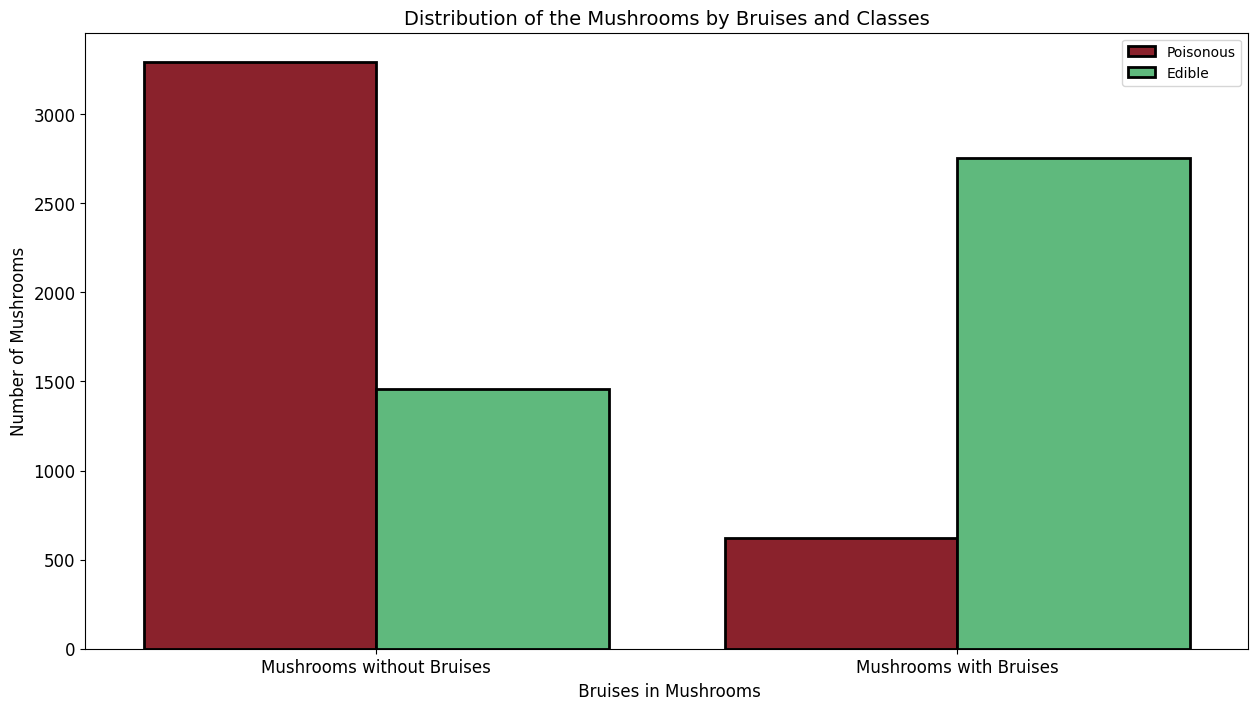

In [23]:
#Bruises

plt.figure(figsize= (15, 8))
fplot = sns.countplot(x = 'bruises', hue= 'class',data= df,order=df['bruises'].value_counts().index,
              palette= ['#9b111e','#50c878'],edgecolor= (0,0,0), linewidth= 2)
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.xlabel(" Bruises in Mushrooms", fontsize= 12)
plt.ylabel("Number of Mushrooms", fontsize= 12)
fplot.set_xticklabels(['Mushrooms without Bruises', 'Mushrooms with Bruises'])
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)
plt.title("Distribution of the Mushrooms by Bruises and Classes", fontsize = 14)
plt.show()

### Observation:- 
 - Mushrooms without Bruises are highly poisonous and 
 mushrooms with bruises are highly edible.

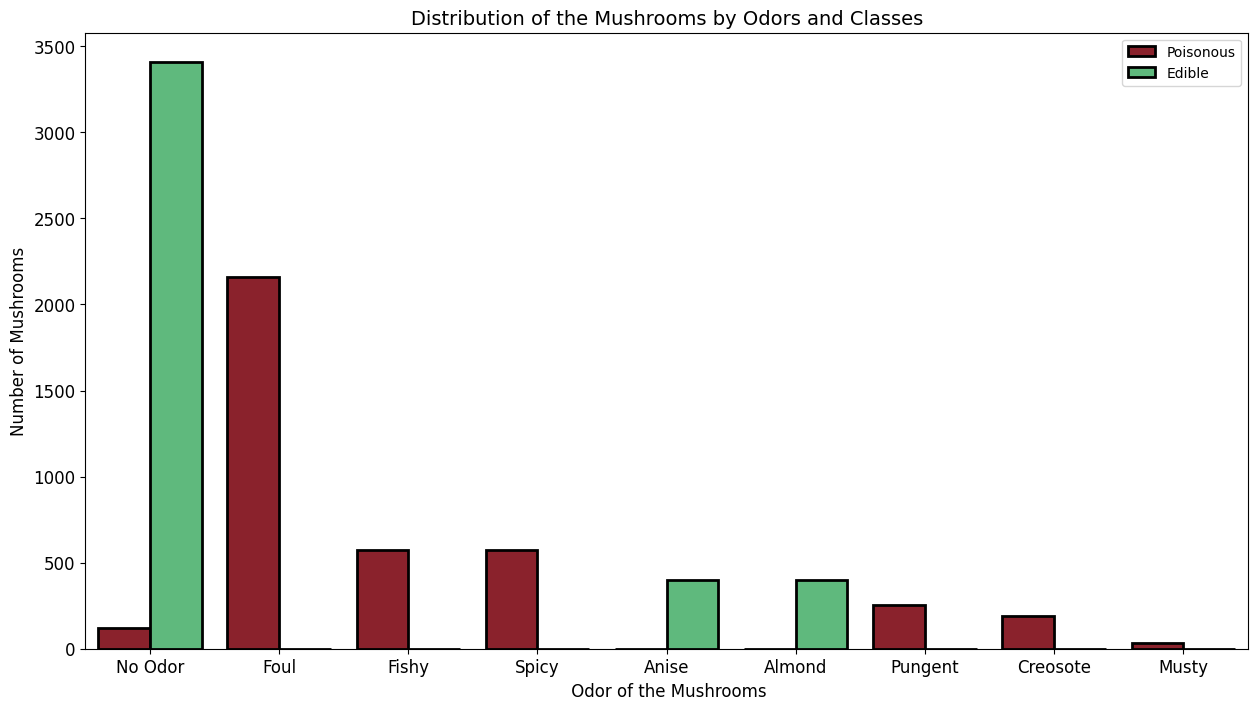

In [24]:
#Odor

plt.figure(figsize= (15, 8))
fplot = sns.countplot(x = 'odor', hue= 'class',data= df,order=df['odor'].value_counts().index,
              palette= ['#9b111e','#50c878'],edgecolor= (0,0,0), linewidth= 2)
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.xlabel(" Odor of the Mushrooms", fontsize= 12)
plt.ylabel("Number of Mushrooms", fontsize= 12)
fplot.set_xticklabels(['No Odor', 'Foul', 'Fishy', 'Spicy', 'Anise', 'Almond', 'Pungent','Creosote', 'Musty'])
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)
plt.title("Distribution of the Mushrooms by Odors and Classes", fontsize = 14)
plt.show()

### Observation:-
 - From the above plot we can say that, mushrooms with no odor are highly edible class and mushrooms with foul odor are highly poisonous class.
 - Also the mushrooms with fishy, spicy, pungent, creostote and musty odor have poisonous class and mushrooms with anise and almond odor have edible class.

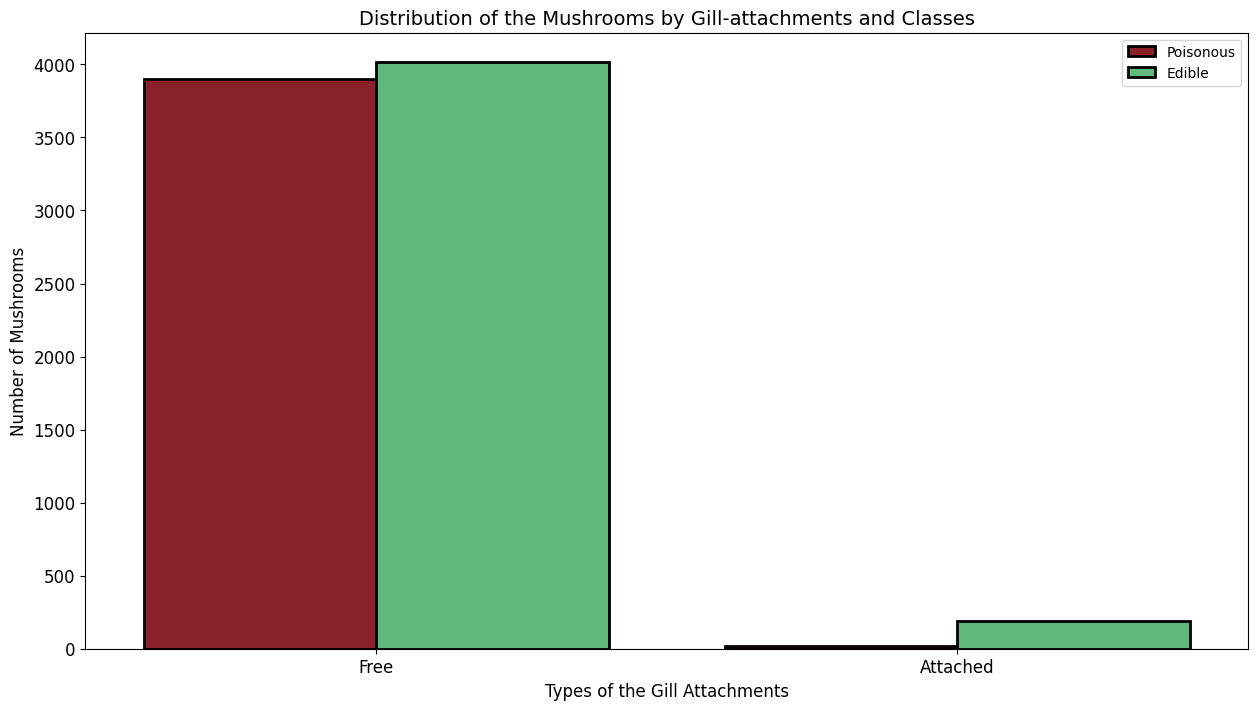

In [25]:
#Gill - Attachments

plt.figure(figsize= (15, 8))
fplot = sns.countplot(x = 'gill-attachment', hue= 'class',data= df,order=df['gill-attachment'].value_counts().index,
              palette= ['#9b111e','#50c878'],edgecolor= (0,0,0), linewidth= 2)
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.xlabel("Types of the Gill Attachments", fontsize= 12)
plt.ylabel("Number of Mushrooms", fontsize= 12)
fplot.set_xticklabels(['Free','Attached'])
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)
plt.title("Distribution of the Mushrooms by Gill-attachments and Classes", fontsize = 14)
plt.show()

### Observation:-
 - From the above plot we can say that free type gill attachments are nearly equaly distributed based on the mushrooms classes.
 - Attached type gill attachments are mostly edible mushroom class.

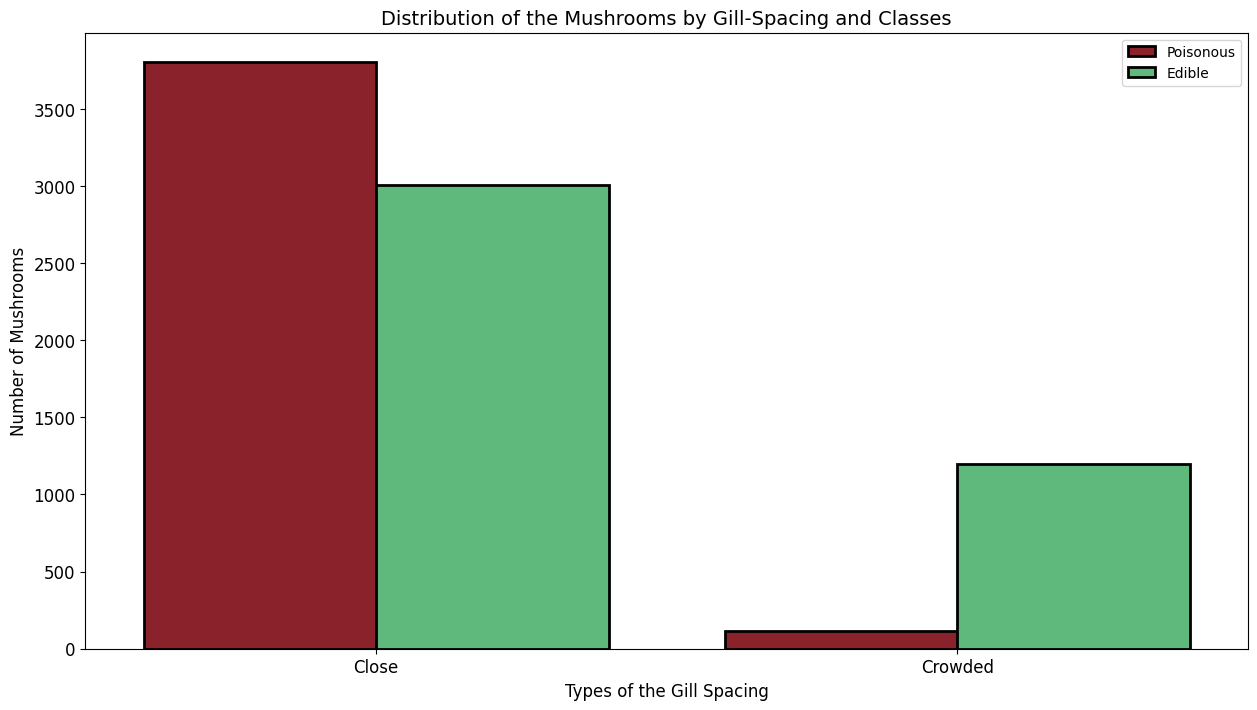

In [26]:
#Gill - Spacing

plt.figure(figsize= (15, 8))
fplot = sns.countplot(x = 'gill-spacing', hue= 'class',data= df,order=df['gill-spacing'].value_counts().index,
              palette= ['#9b111e','#50c878'],edgecolor= (0,0,0), linewidth= 2)
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.xlabel("Types of the Gill Spacing", fontsize= 12)
plt.ylabel("Number of Mushrooms", fontsize= 12)
fplot.set_xticklabels(['Close','Crowded'])
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)
plt.title("Distribution of the Mushrooms by Gill-Spacing and Classes", fontsize = 14)
plt.show()

### Observation:-
 - The distribution of poisonous and edible mushrooms classes are pretty close to each other for close type gill spacing mushrooms.
 - Crowded type gill spacing are highly edible mushrooms class.

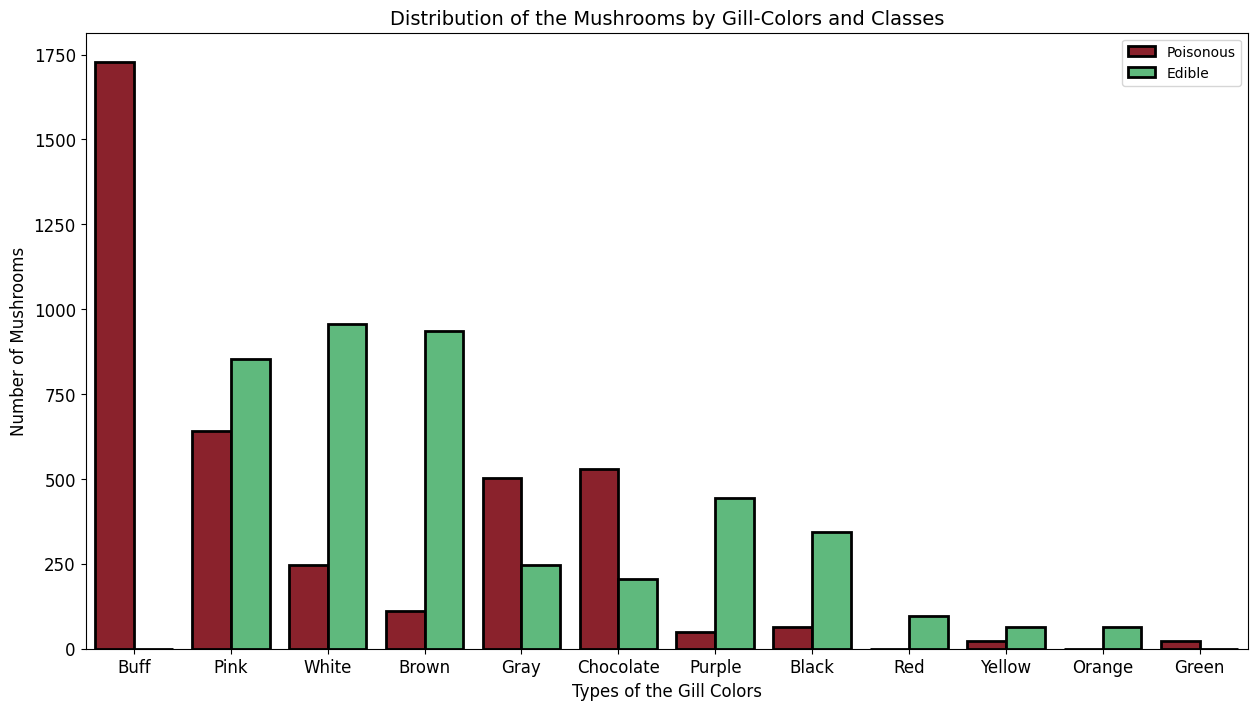

In [27]:
#Gill - Color

plt.figure(figsize= (15, 8))
fplot = sns.countplot(x = 'gill-color', hue= 'class',data= df,order=df['gill-color'].value_counts().index,
              palette= ['#9b111e','#50c878'],edgecolor= (0,0,0), linewidth= 2)
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.xlabel("Types of the Gill Colors", fontsize= 12)
plt.ylabel("Number of Mushrooms", fontsize= 12)
fplot.set_xticklabels(['Buff', 'Pink', 'White', 'Brown', 'Gray', 'Chocolate', 'Purple', 'Black', 'Red',
                       'Yellow', 'Orange', 'Green'])
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)
plt.title("Distribution of the Mushrooms by Gill-Colors and Classes", fontsize = 14)
plt.show()

### Observation:- 
 - Here buff colored gill type are highly poisonous mushrooms.
 - White, Brown, Purple, Black and Red gill types are highly edible mushrooms.

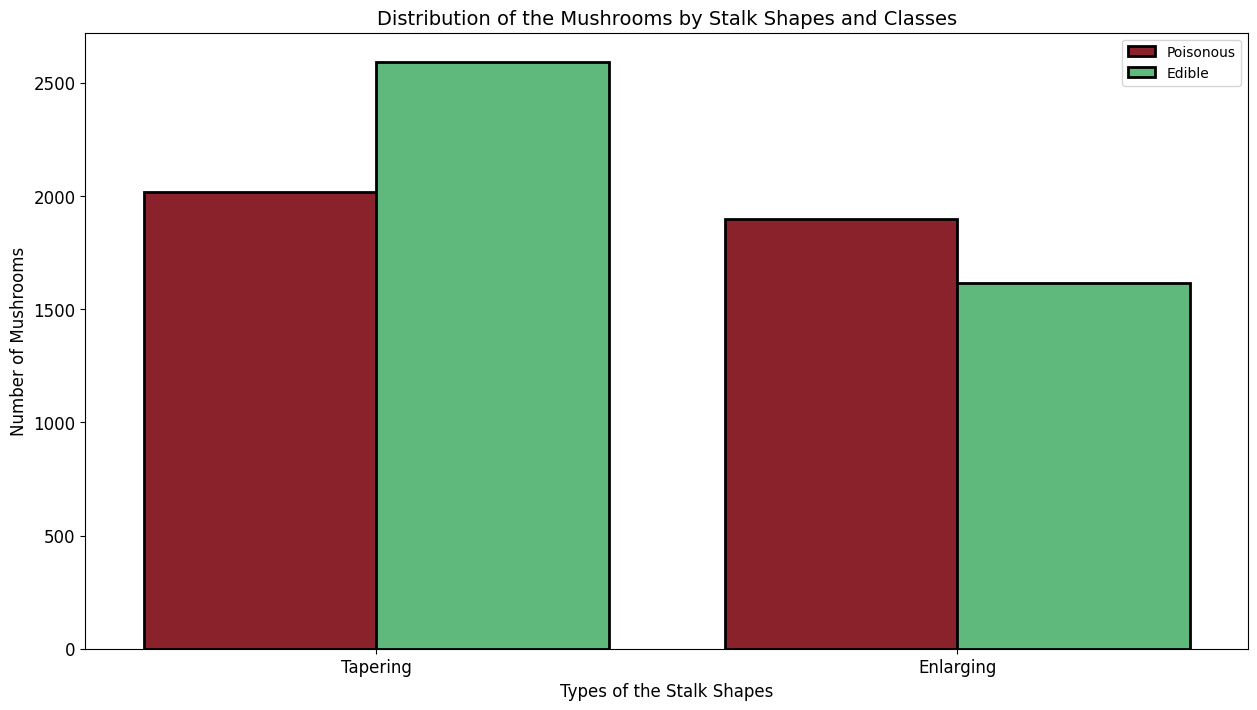

In [28]:
#Stalk Shape

plt.figure(figsize= (15, 8))
fplot = sns.countplot(x = 'stalk-shape', hue= 'class',data= df,order=df['stalk-shape'].value_counts().index,
              palette= ['#9b111e','#50c878'],edgecolor= (0,0,0), linewidth= 2)
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.xlabel("Types of the Stalk Shapes", fontsize= 12)
plt.ylabel("Number of Mushrooms", fontsize= 12)
fplot.set_xticklabels(['Tapering', 'Enlarging'])
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)
plt.title("Distribution of the Mushrooms by Stalk Shapes and Classes", fontsize = 14)
plt.show()

### Observation:-
 - The distribution of the poisonous and edible mushrooms classes are pretty close to each other for both tapering and enlarging types of the stalk shapes.

In [29]:
df['stalk-root'].value_counts()

stalk-root
b    3776
?    2480
e    1120
c     556
r     192
Name: count, dtype: int64

In [30]:
#Here we replace '?' with most frequent values in stalk root features
df['stalk-root'] = df['stalk-root'].replace('?', 'b')

In [31]:
df['stalk-root'].value_counts()

stalk-root
b    6256
e    1120
c     556
r     192
Name: count, dtype: int64

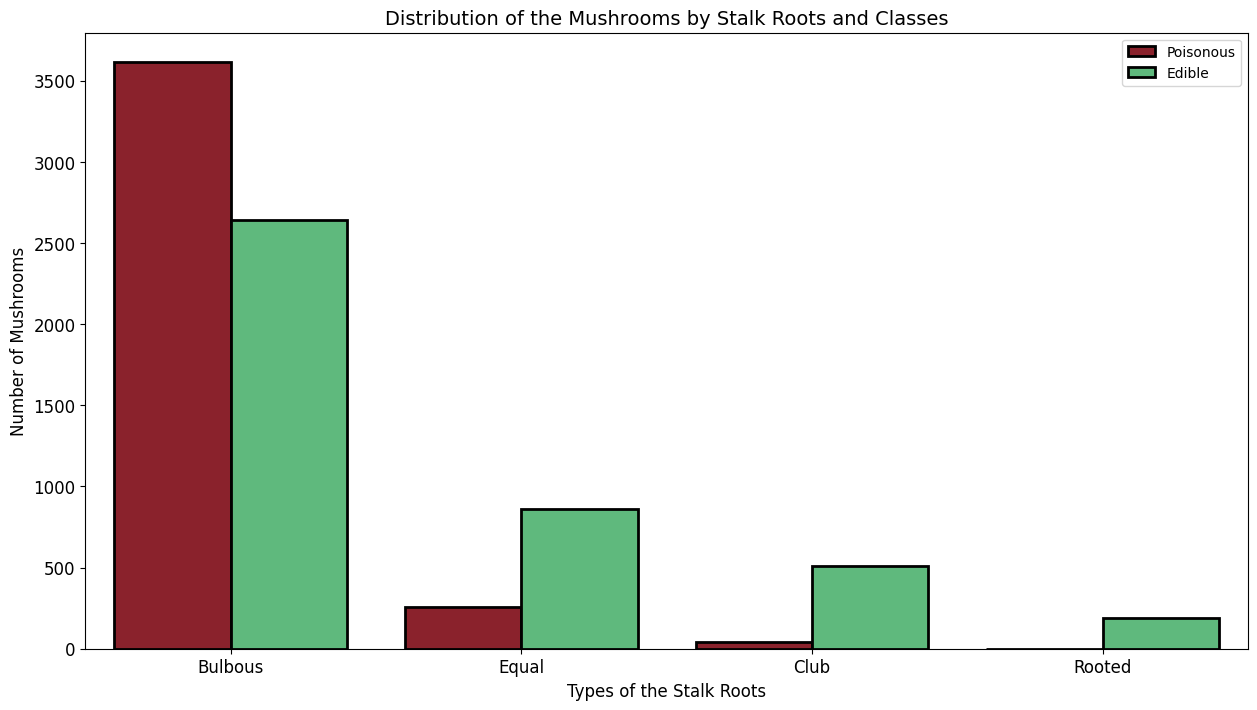

In [32]:
#Stalk Roots

plt.figure(figsize= (15, 8))
fplot = sns.countplot(x = 'stalk-root', hue= 'class',data= df,order=df['stalk-root'].value_counts().index,
              palette= ['#9b111e','#50c878'],edgecolor= (0,0,0), linewidth= 2)
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.xlabel("Types of the Stalk Roots", fontsize= 12)
plt.ylabel("Number of Mushrooms", fontsize= 12)
fplot.set_xticklabels(['Bulbous', 'Equal', 'Club', 'Rooted'])
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)
plt.title("Distribution of the Mushrooms by Stalk Roots and Classes", fontsize = 14)
plt.show()

### Observation:-
 - The Bulbous type stalk root is highly poisonous mushrooms, but the equal, club and rooted are highly edible mushrooms.

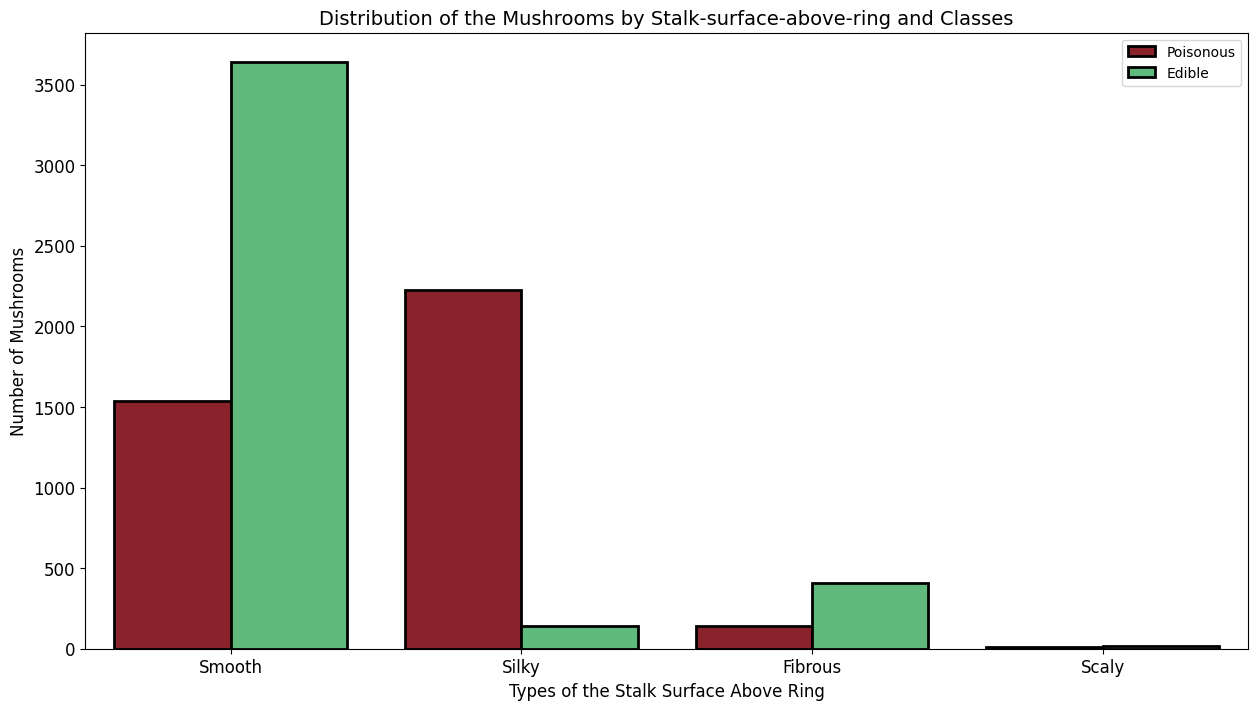

In [33]:
#Stalk Surface Above Ring

plt.figure(figsize= (15, 8))
fplot = sns.countplot(x = 'stalk-surface-above-ring', hue= 'class',data= df,order=df['stalk-surface-above-ring'].value_counts().index,
              palette= ['#9b111e','#50c878'],edgecolor= (0,0,0), linewidth= 2)
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.xlabel("Types of the Stalk Surface Above Ring", fontsize= 12)
plt.ylabel("Number of Mushrooms", fontsize= 12)
fplot.set_xticklabels(['Smooth', 'Silky', 'Fibrous', 'Scaly'])
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)
plt.title("Distribution of the Mushrooms by Stalk-surface-above-ring and Classes", fontsize = 14)
plt.show()

### Observation:- 
 - Edible mushrooms with smooth type stalk surface above ring are highly distributed, whereas poisonous mushrooms with silky type stalk surface above ring are highly distributed.

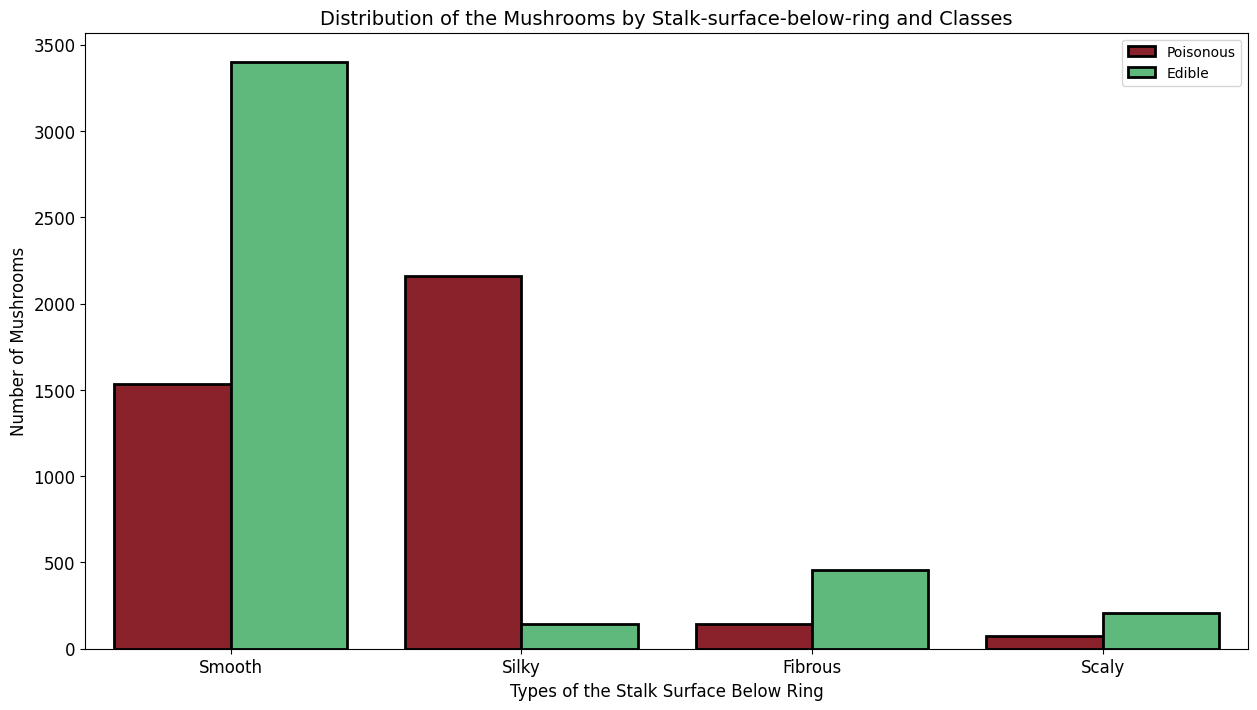

In [34]:
#Stalk Surface Below Ring

plt.figure(figsize= (15, 8))
fplot = sns.countplot(x = 'stalk-surface-below-ring', hue= 'class',data= df,order=df['stalk-surface-below-ring'].value_counts().index,
              palette= ['#9b111e','#50c878'],edgecolor= (0,0,0), linewidth= 2)
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.xlabel("Types of the Stalk Surface Below Ring", fontsize= 12)
plt.ylabel("Number of Mushrooms", fontsize= 12)
fplot.set_xticklabels(['Smooth', 'Silky', 'Fibrous', 'Scaly'])
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)
plt.title("Distribution of the Mushrooms by Stalk-surface-below-ring and Classes", fontsize = 14)
plt.show()

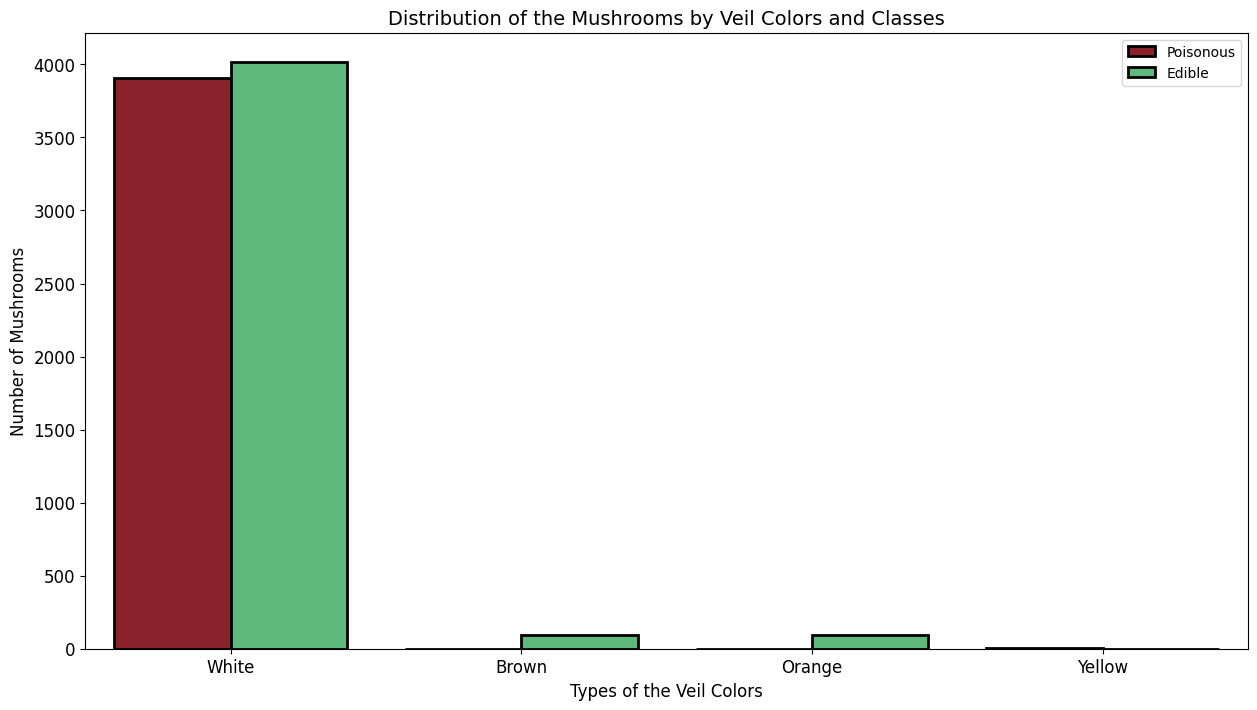

In [35]:
#Veil Color

plt.figure(figsize= (15, 8))
fplot = sns.countplot(x = 'veil-color', hue= 'class',data= df,order=df['veil-color'].value_counts().index,
              palette= ['#9b111e','#50c878'],edgecolor= (0,0,0), linewidth= 2)
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.xlabel("Types of the Veil Colors", fontsize= 12)
plt.ylabel("Number of Mushrooms", fontsize= 12)
fplot.set_xticklabels(['White', 'Brown', "Orange", 'Yellow'])
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)
plt.title("Distribution of the Mushrooms by Veil Colors and Classes", fontsize = 14)
plt.show()

### Observation:-
 - The distribution of the poisonous and edible mushrooms classes for white type veil color is nearly close to each other.
 - Brown and Orange type of veil colors are edible mushrooms and also less in numbers.

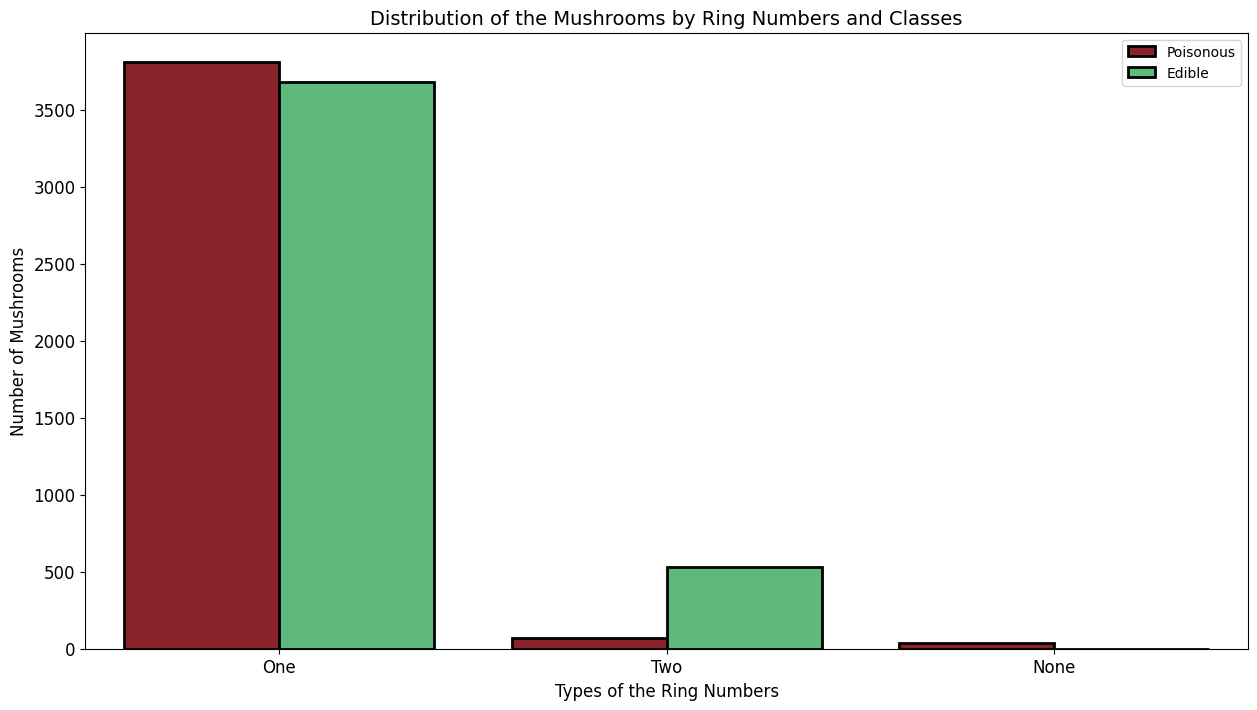

In [36]:
#Ring Numbers

plt.figure(figsize= (15, 8))
fplot = sns.countplot(x = 'ring-number', hue= 'class',data= df,order=df['ring-number'].value_counts().index,
              palette= ['#9b111e','#50c878'],edgecolor= (0,0,0), linewidth= 2)
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.xlabel("Types of the Ring Numbers", fontsize= 12)
plt.ylabel("Number of Mushrooms", fontsize= 12)
fplot.set_xticklabels(['One', 'Two', 'None'])
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)
plt.title("Distribution of the Mushrooms by Ring Numbers and Classes", fontsize = 14)
plt.show()

### Observtions:- 
 - The distribution of poisonous and edible mushrooms classes for one type ring number are pretty close to each other.
 - Two type ring number are edible mushroom class.

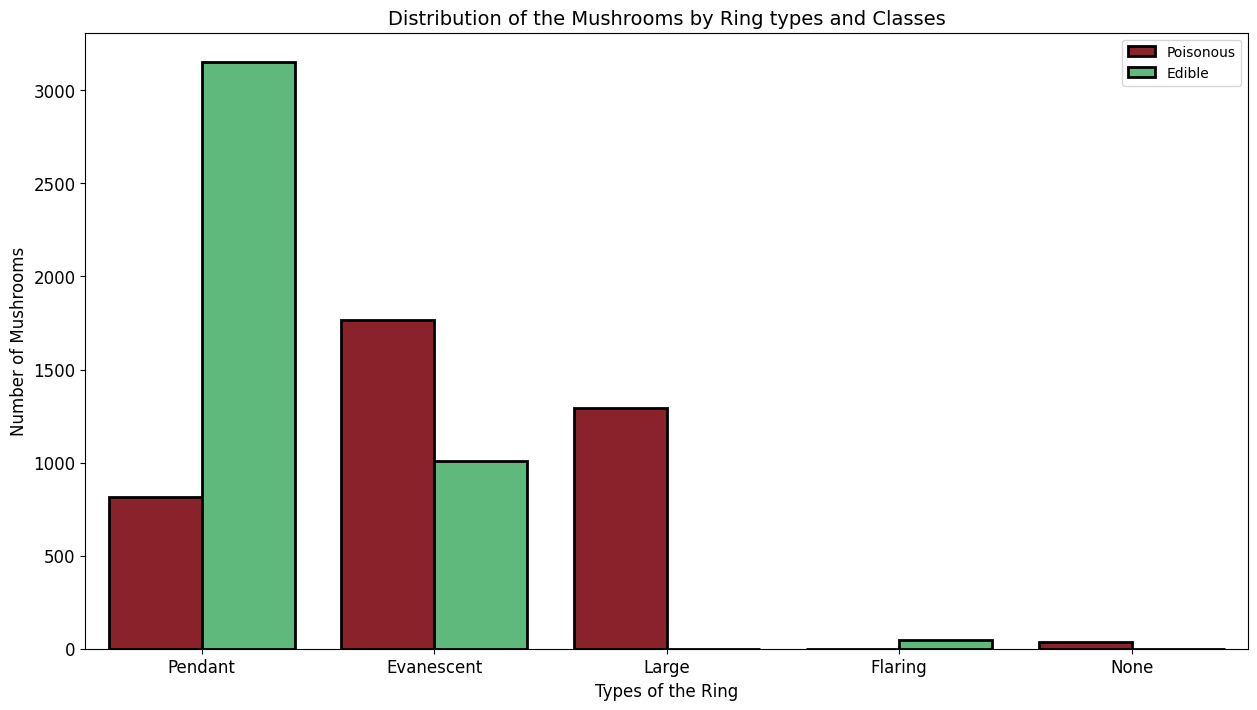

In [37]:
#Ring Types

plt.figure(figsize= (15, 8))
fplot = sns.countplot(x = 'ring-type', hue= 'class',data= df,order=df['ring-type'].value_counts().index,
              palette= ['#9b111e','#50c878'],edgecolor= (0,0,0), linewidth= 2)
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.xlabel("Types of the Ring", fontsize= 12)
plt.ylabel("Number of Mushrooms", fontsize= 12)
fplot.set_xticklabels(['Pendant', 'Evanescent', 'Large', 'Flaring', 'None'])
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)
plt.title("Distribution of the Mushrooms by Ring types and Classes", fontsize = 14)
plt.show()

### Observation:-
 - Pendant ring type are edible mushroom classes and large ring type are poisonous mushroom classes.

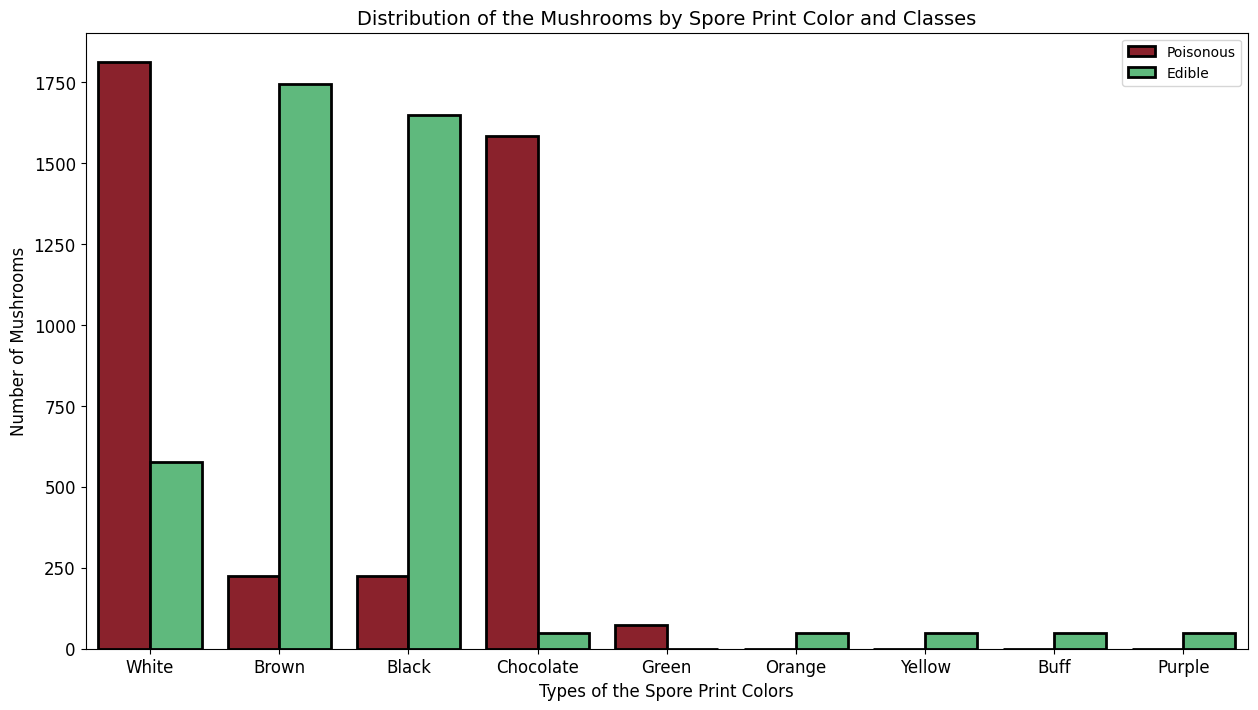

In [38]:
#Spore Print Colors

plt.figure(figsize= (15, 8))
fplot = sns.countplot(x = 'spore-print-color', hue= 'class',data= df,order=df['spore-print-color'].value_counts().index,
              palette= ['#9b111e','#50c878'],edgecolor= (0,0,0), linewidth= 2)
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.xlabel("Types of the Spore Print Colors", fontsize= 12)
plt.ylabel("Number of Mushrooms", fontsize= 12)
fplot.set_xticklabels(['White', 'Brown', 'Black', 'Chocolate', 'Green', 'Orange', 'Yellow', 'Buff', 'Purple'])
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)
plt.title("Distribution of the Mushrooms by Spore Print Color and Classes", fontsize = 14)
plt.show()

### Observations:- 
 - From the above plot we can say that, white and chocolate spore print colors are highly poisonous mushroom classes whereas brown and black spore print colors are highly edible mushroom classes.

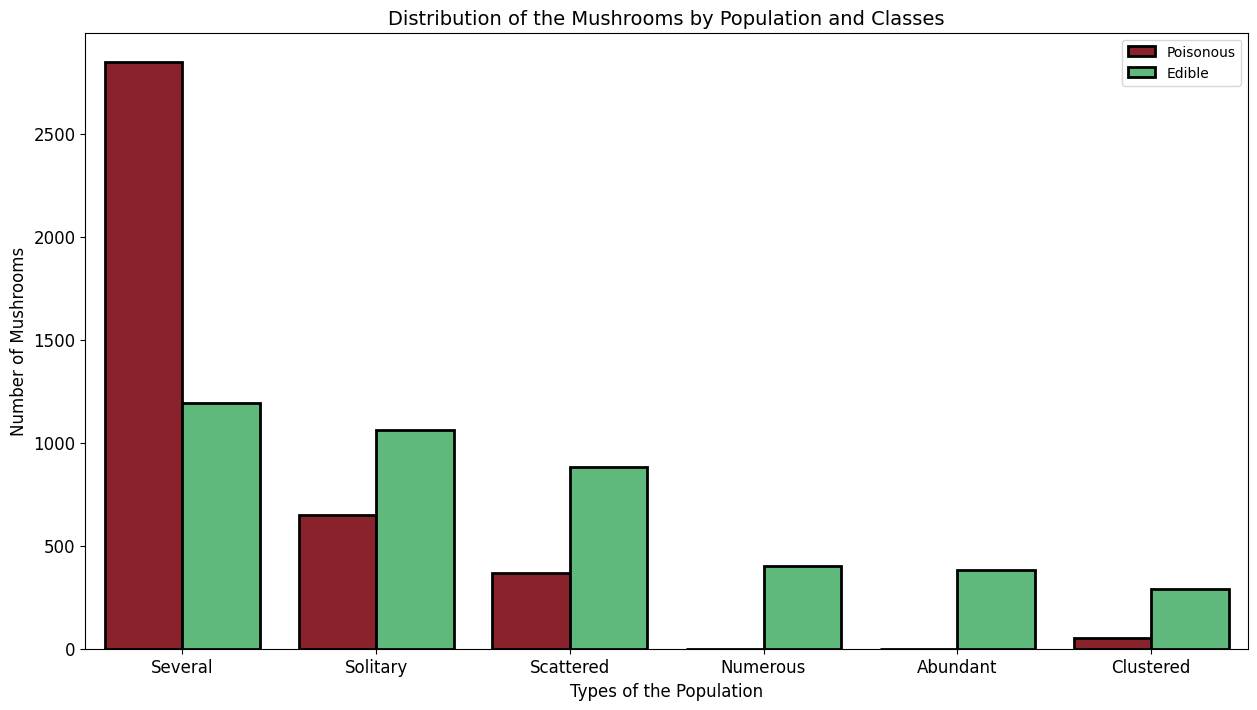

In [39]:
#Population

plt.figure(figsize= (15, 8))
fplot = sns.countplot(x = 'population', hue= 'class',data= df,order=df['population'].value_counts().index,
              palette= ['#9b111e','#50c878'],edgecolor= (0,0,0), linewidth= 2)
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.xlabel("Types of the Population", fontsize= 12)
plt.ylabel("Number of Mushrooms", fontsize= 12)
fplot.set_xticklabels(['Several', 'Solitary', 'Scattered', 'Numerous', 'Abundant', 'Clustered'])
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)
plt.title("Distribution of the Mushrooms by Population and Classes", fontsize = 14)
plt.show()

### Observation:-
 - The mushrooms with several type populated are highly poisonous.
 - Mushrooms with numerous, abundant and clustered type populated are edible. 

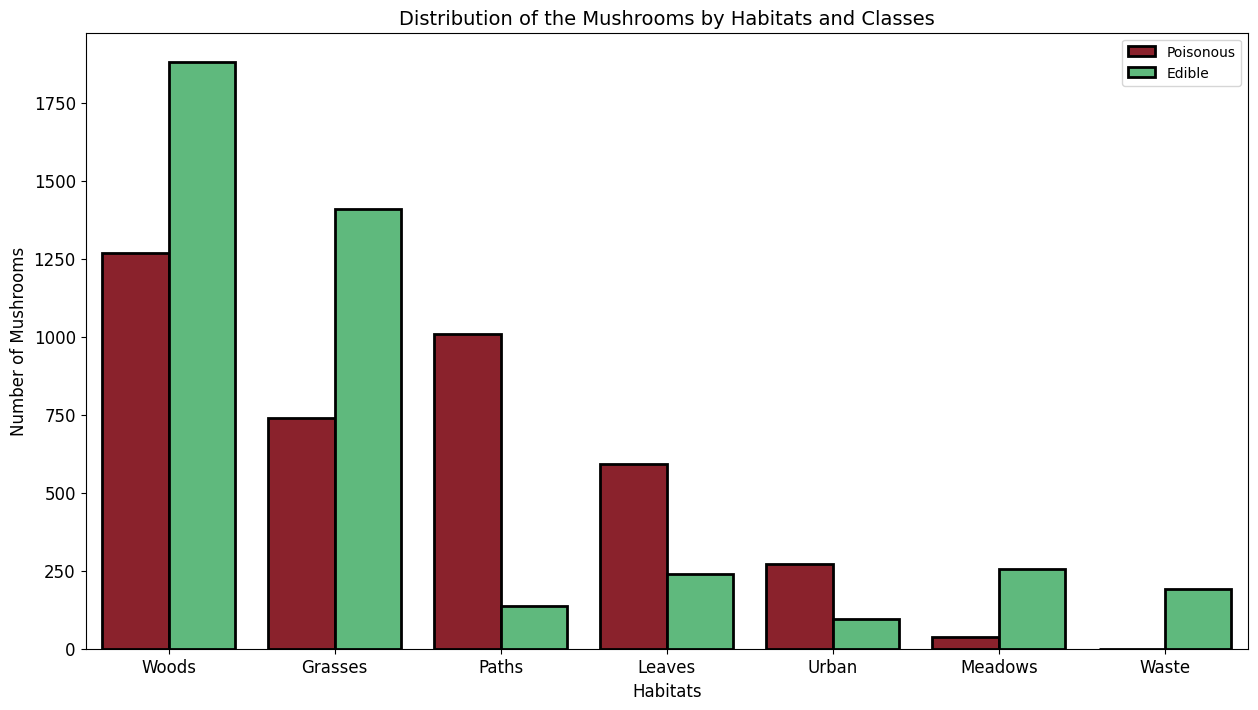

In [40]:
#Habitats

plt.figure(figsize= (15, 8))
fplot = sns.countplot(x = 'habitat', hue= 'class',data= df,order=df['habitat'].value_counts().index,
              palette= ['#9b111e','#50c878'],edgecolor= (0,0,0), linewidth= 2)
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.xlabel("Habitats", fontsize= 12)
plt.ylabel("Number of Mushrooms", fontsize= 12)
fplot.set_xticklabels(['Woods', 'Grasses', 'Paths', 'Leaves', 'Urban', 'Meadows', 'Waste'])
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)
plt.title("Distribution of the Mushrooms by Habitats and Classes", fontsize = 14)
plt.show()

### Observation:-
 - From the above plot we can say that, Woods and grasses type habitats are highly edible mushrooms classes, whereas paths type habitats are highly poisonous mushroom classes. 

### Handling Categorical Data
 - Here we use Label Encoder technique for converting categorical features to numerical features 

In [41]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [42]:
for cols in df.columns:
  df[cols] = encoder.fit_transform(df[cols])

In [43]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


In [44]:
new_df = df.copy()

In [45]:
new_df = new_df.drop('class', axis = 1)
new_df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,2,7,7,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,2,7,7,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,2,7,7,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,2,7,7,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,2,7,7,2,1,0,3,0,1


### Features Scaling 
 - We find out best features which will contribute and have good relations with target variable. Some methods for selection are as follows:
 1. Heatmap 
 2. Feature_importances
 3. ExtraTreesClassifier

In [46]:
new_df.corr()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
cap-shape,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,0.063794,...,-0.030417,-0.032591,-0.031659,-0.030390,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,-0.014123,...,0.089090,0.107965,0.066050,0.068885,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,-0.456496,...,-0.060837,-0.047710,0.002364,0.008057,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,0.099364,...,0.460824,0.458983,0.083538,0.092874,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,0.459766,...,0.118617,0.061820,0.174532,0.169407,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,0.186485,...,-0.088916,-0.116177,0.099299,0.097160,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,0.080895,...,-0.212359,-0.213775,0.274574,0.253505,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,0.214576,...,0.056310,0.010894,0.296548,0.278708,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,-0.175699,...,0.224287,0.257224,-0.058299,-0.074781,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972
stalk-shape,0.063794,-0.014123,-0.456496,0.099364,0.459766,0.186485,0.080895,0.214576,-0.175699,1.000000,...,0.015193,-0.034399,0.223439,0.235794,0.162604,-0.293221,-0.291444,0.258831,0.087383,-0.269216


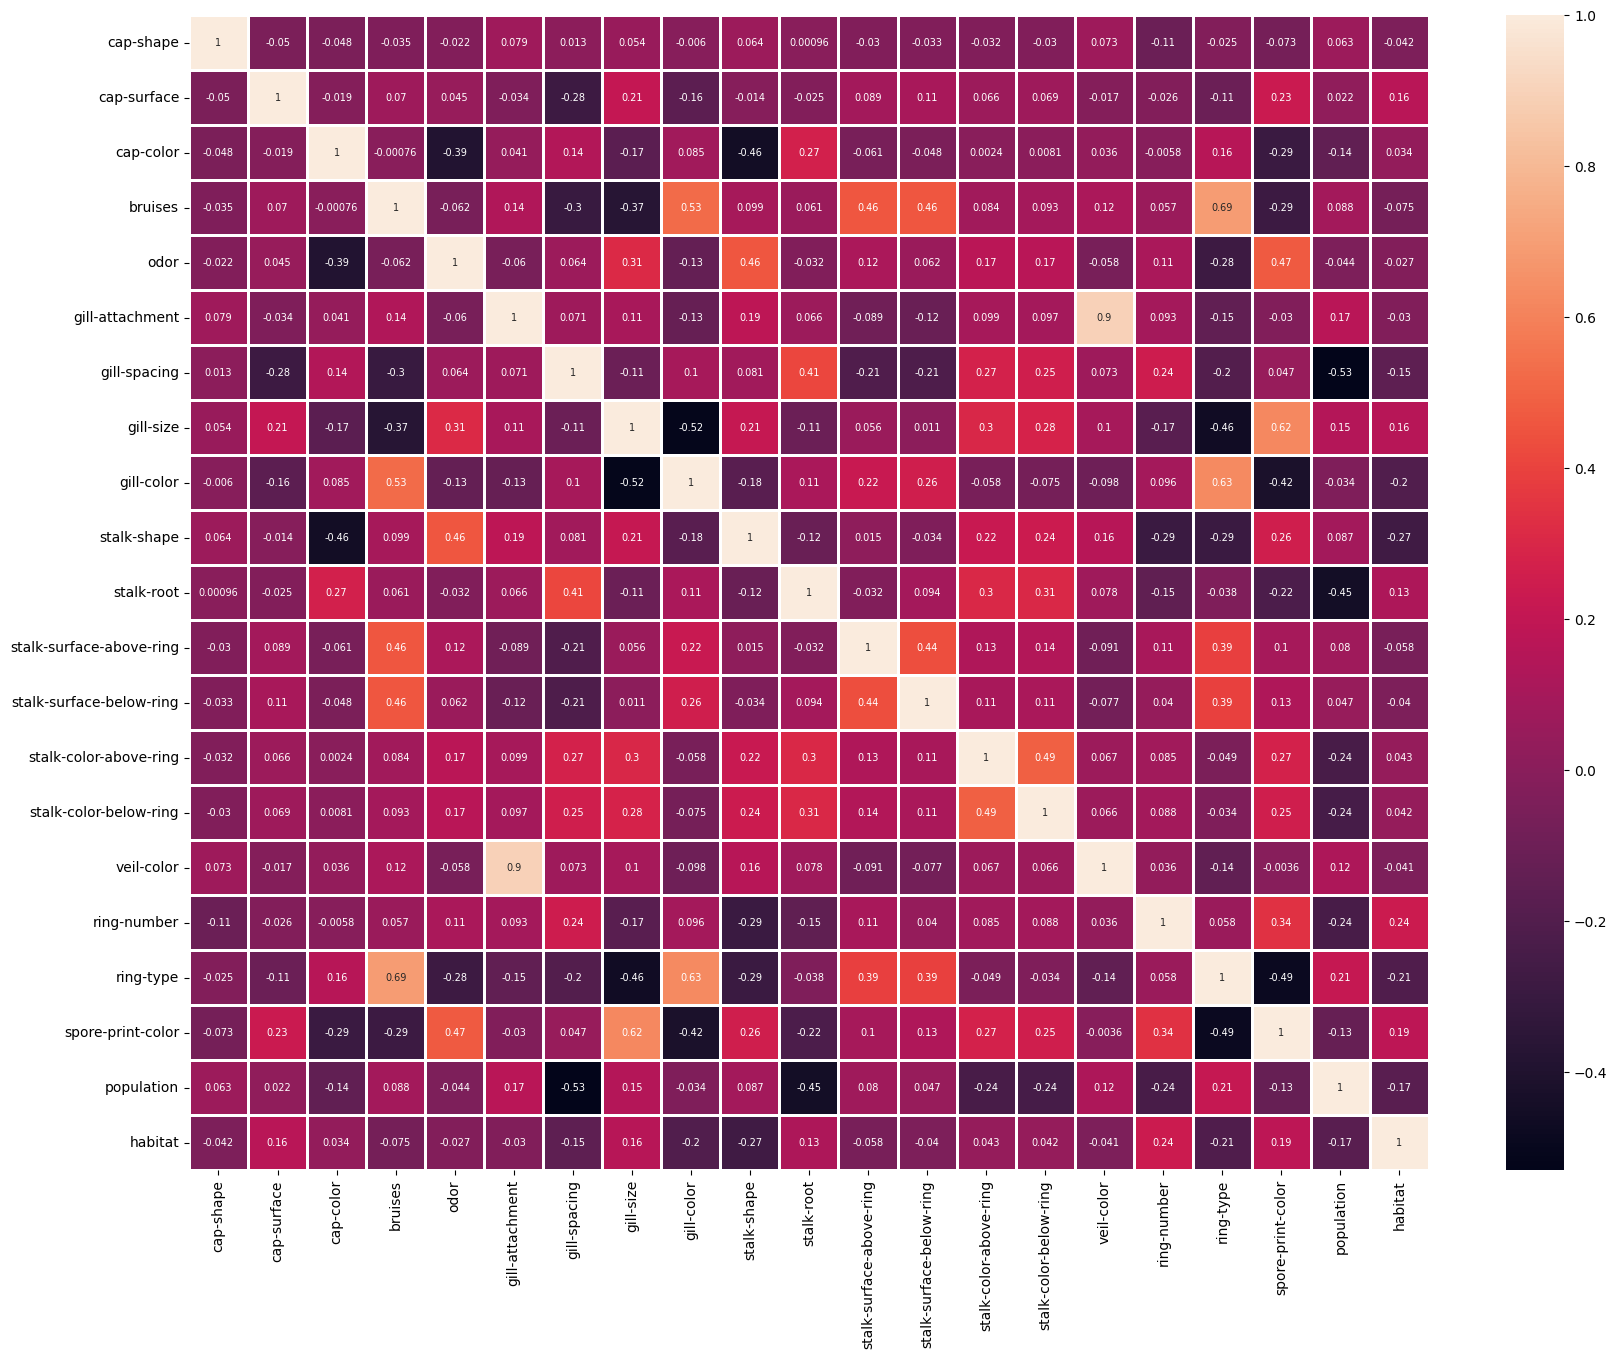

In [47]:
plt.figure(figsize = (20, 15))
corr= new_df.corr() 
top_features = corr.index
#correlation between independent variables 
sns.heatmap(new_df[top_features].corr(), annot = True, linewidth = 1, annot_kws = {'size':7})
plt.show()

In [48]:
#If two independent features are highly correlated then we can drop one of the features.
#bcoz both features doing same task.

In [49]:
#Remove the correlated independent features by using threshold values
threshold = 0.5 

In [50]:
def correlation(dataset, threshold):
    col_corr = set() #set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:#we are interested in absolute coeff value
                colname = corr_matrix.columns[i] #getting the name of column
                col_corr.add(colname)
    return col_corr

In [51]:
correlation(new_df, threshold)

{'gill-color', 'population', 'ring-type', 'spore-print-color', 'veil-color'}

In [52]:
#Here we can see that out of 22 coluns 5 columns are selected as best features.
#But all columns of datasets are important for classification. 